In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import *
from keras.layers import *

In [2]:
train_data = pd.read_csv('/content/drive/MyDrive/캐글스터디/반도체 박막두께분석/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/캐글스터디/반도체 박막두께분석/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/캐글스터디/반도체 박막두께분석/sample_submission.csv')

In [3]:
train_data.head(10)

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225
0,10,10,10,10,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,0.246511,0.259407,0.260862,0.242524,0.253870,0.245156,0.245548,0.255501,0.228948,0.228632,0.225802,0.249418,0.246910,0.248747,0.251088,0.244886,0.233906,0.242632,0.221792,0.236521,0.220555,0.243761,0.230202,0.226122,0.220671,0.235075,0.224560,0.226998,0.209499,0.226594,...,0.160126,0.164192,0.171406,0.162364,0.168591,0.166626,0.169696,0.196383,0.194145,0.190646,0.186797,0.191748,0.190886,0.208518,0.211220,0.229286,0.226265,0.226954,0.229023,0.237112,0.262421,0.262566,0.272062,0.292049,0.305353,0.292889,0.317479,0.316911,0.321371,0.355636,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,10,10,10,20,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,0.191318,0.195369,0.200536,0.197588,0.198726,0.191803,0.199625,0.206465,0.182836,0.193341,0.180459,0.196416,0.185398,0.188913,0.176011,0.173457,0.182249,0.176816,0.192716,0.185924,0.183816,0.186900,0.161040,0.173525,0.172948,0.182634,0.161153,0.158073,0.152335,0.148293,...,0.327076,0.331195,0.337722,0.340189,0.342748,0.351925,0.372989,0.389663,0.396216,0.384977,0.383701,0.403894,0.406382,0.429342,0.409908,0.439307,0.432569,0.439114,0.459541,0.454988,0.475268,0.478575,0.483466,0.496912,0.499542,0.522705,0.524767,0.533952,0.558729,0.572470,0.557203,0.573656,0.587998,0.612754,0.627825,0.633393,0.637706,0.625981,0.653231,0.637853
2,10,10,10,30,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,0.157582,0.158885,0.156911,0.166162,0.148831,0.144950,0.151362,0.145110,0.159201,0.139296,0.145313,0.156555,0.145363,0.150352,0.150542,0.142990,0.139572,0.145669,0.144514,0.126263,0.112832,0.117535,0.111473,0.117545,0.107058,0.119299,0.110768,0.124217,0.124496,0.110023,...,0.525450,0.532645,0.539097,0.527091,0.531925,0.530325,0.551716,0.556125,0.567470,0.549711,0.566789,0.574313,0.569873,0.574390,0.601672,0.584206,0.602981,0.598708,0.615189,0.637023,0.626458,0.645439,0.629203,0.640967,0.652762,0.660495,0.676498,0.674599,0.693535,0.699182,0.699864,0.708688,0.721982,0.713464,0.743030,0.741709,0.747743,0.746037,0.737356,0.750391
3,10,10,10,40,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,0.126962,0.134453,0.106717,0.127309,0.099958,0.112908,0.106853,0.108288,0.101393,0.094074,0.086854,0.099669,0.107276,0.091117,0.084525,0.078293,0.076476,0.078559,0.072960,0.075898,0.067963,0.066055,0.087904,0.065373,0.075469,0.080097,0.068895,0.058148,0.057882,0.063258,...,0.616934,0.638654,0.630914,0.647135,0.629796,0.644114,0.641825,0.645360,0.653030,0.656335,0.657734,0.678019,0.676713,0.681540,0.673333,0.686743,0.697500,0.702650,0.693750,0.711013,0.714411,0.701010,0.726972,0.719394,0.726329,0.730821,0.740062,0.747356,0.749405,0.766173,0.764786,0.763788,0.770017,0.787571,0.778866,0.776969,0.774712,0.801526,0.805305,0.784057
4,10,10,10,50,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,0.097895,0.086765,0.078676,0.075729,0.086023,0.070649,0.078957,0.072772,0.069867,0.080523,0.068273,0.074660,0.069852,0.047442,0.067855,0.049580,0.068737,0.041386,0.048697,0.040278,0.050234,0.059371,0.042581,0.037117,0.041503,0.055113,0.034001,0.035846,0.030385,0.048935,...,0.670888,0.692846,0.673025,0.704448,0.696657,0.697524,0.692513,0.714224,0.696880,0.716361,0.723607,0.720018,0.715039,0.705079,0.720913,0.723440,0.719858,0.729948,0.731360,0.728861,0.740501,0.738362,0.749341,0.738456,0.768791,0.770292,0.766630,0.779970,0.787695,0.766521,0.786677,0.802271,0.806557,0.799614,0.789333,0.804087,0.787763,0.794948,0.819105,0.801781
5,10,10,10,60,0.064314,0.082353,0.073697,0.059653,0.071695,0.049250,0.056011,0.049143,0.061499,0.042358,0.049665,0.044624,0.050232,0.044264,0.053850,0.032225,0.049626,0.036549,0.036874,0.052143,0

In [4]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# train_data1=sc.fit_transform(train_data)

In [3]:
X=train_data.iloc[:,4:]
y=train_data.iloc[:,:4]
testX=test_data.iloc[:,4:]
testy=test_data.iloc[:,:4]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=1, shuffle= True)

In [5]:
X_train.shape

(648000, 226)

In [6]:
# pd.DataFrame.to_string(X_train)

- Keras를 이용한 model 설정 (Only Dense층만, batch_size에만 변화를 줌
)

In [7]:
from keras.models import Sequential
from keras import *
model = Sequential()
model.add(tf.keras.Input(shape=(X_train.shape[1],)))
model.add(Dense(226, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='relu'))

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss= 'mean_absolute_error', metrics ='MeanAbsoluteError' )

In [18]:
model.fit(X_train,y_train, batch_size= 1024, epochs= 1000, verbose=2, validation_split= 0.3)

Epoch 1/1000
443/443 - 3s - loss: 121.5583 - mean_absolute_error: 121.5583 - val_loss: 114.8132 - val_mean_absolute_error: 114.8132
Epoch 2/1000
443/443 - 2s - loss: 113.5382 - mean_absolute_error: 113.5382 - val_loss: 111.1110 - val_mean_absolute_error: 111.1110
Epoch 3/1000
443/443 - 2s - loss: 109.9458 - mean_absolute_error: 109.9458 - val_loss: 109.0773 - val_mean_absolute_error: 109.0773
Epoch 4/1000
443/443 - 2s - loss: 108.9476 - mean_absolute_error: 108.9476 - val_loss: 108.5255 - val_mean_absolute_error: 108.5255
Epoch 5/1000
443/443 - 2s - loss: 108.5310 - mean_absolute_error: 108.5310 - val_loss: 108.2060 - val_mean_absolute_error: 108.2060
Epoch 6/1000
443/443 - 2s - loss: 108.2124 - mean_absolute_error: 108.2124 - val_loss: 107.8865 - val_mean_absolute_error: 107.8865
Epoch 7/1000
443/443 - 2s - loss: 107.9184 - mean_absolute_error: 107.9184 - val_loss: 107.6038 - val_mean_absolute_error: 107.6038
Epoch 8/1000
443/443 - 2s - loss: 107.6204 - mean_absolute_error: 107.6204 -

KeyboardInterrupt: ignored

In [ ]:
model.fit(X_train,y_train, batch_size= 32, epochs= 100, verbose=2, validation_split= 0.3)


In [ ]:
model.fit(X_train,y_train, batch_size= 256, epochs= 100, verbose=2, validation_split= 0.3)

Epoch 1/100
1772/1772 - 6s - loss: 5.4352 - mean_absolute_error: 5.4352 - val_loss: 6.2129 - val_mean_absolute_error: 6.2129
Epoch 2/100
1772/1772 - 5s - loss: 5.4296 - mean_absolute_error: 5.4296 - val_loss: 6.2512 - val_mean_absolute_error: 6.2512
Epoch 3/100
1772/1772 - 5s - loss: 5.4544 - mean_absolute_error: 5.4544 - val_loss: 6.2288 - val_mean_absolute_error: 6.2288
Epoch 4/100
1772/1772 - 5s - loss: 5.4440 - mean_absolute_error: 5.4440 - val_loss: 6.2195 - val_mean_absolute_error: 6.2195
Epoch 5/100
1772/1772 - 5s - loss: 5.4130 - mean_absolute_error: 5.4130 - val_loss: 6.2512 - val_mean_absolute_error: 6.2512
Epoch 6/100
1772/1772 - 5s - loss: 5.3918 - mean_absolute_error: 5.3918 - val_loss: 6.1527 - val_mean_absolute_error: 6.1527
Epoch 7/100
1772/1772 - 5s - loss: 5.3632 - mean_absolute_error: 5.3632 - val_loss: 6.1887 - val_mean_absolute_error: 6.1887
Epoch 8/100
1772/1772 - 5s - loss: 5.3507 - mean_absolute_error: 5.3507 - val_loss: 6.1677 - val_mean_absolute_error: 6.1677


In [ ]:
model.fit(X_train,y_train, batch_size= 512, epochs= 100, verbose=2, validation_split= 0.3)

Epoch 1/100
886/886 - 3s - loss: 4.2671 - mean_absolute_error: 4.2671 - val_loss: 5.3612 - val_mean_absolute_error: 5.3612
Epoch 2/100
886/886 - 3s - loss: 4.2849 - mean_absolute_error: 4.2849 - val_loss: 5.3805 - val_mean_absolute_error: 5.3805
Epoch 3/100
886/886 - 3s - loss: 4.2968 - mean_absolute_error: 4.2968 - val_loss: 5.4126 - val_mean_absolute_error: 5.4126
Epoch 4/100
886/886 - 3s - loss: 4.3002 - mean_absolute_error: 4.3002 - val_loss: 5.4021 - val_mean_absolute_error: 5.4021
Epoch 5/100
886/886 - 3s - loss: 4.2933 - mean_absolute_error: 4.2933 - val_loss: 5.4013 - val_mean_absolute_error: 5.4013
Epoch 6/100
886/886 - 3s - loss: 4.2927 - mean_absolute_error: 4.2927 - val_loss: 5.4172 - val_mean_absolute_error: 5.4172
Epoch 7/100
886/886 - 3s - loss: 4.2901 - mean_absolute_error: 4.2901 - val_loss: 5.3684 - val_mean_absolute_error: 5.3684
Epoch 8/100
886/886 - 3s - loss: 4.2829 - mean_absolute_error: 4.2829 - val_loss: 5.3703 - val_mean_absolute_error: 5.3703
Epoch 9/100
886/

In [ ]:
model.fit(X_train,y_train, batch_size= 1024, epochs= 100, verbose=2, validation_split= 0.3)

Epoch 1/100
443/443 - 2s - loss: 3.8229 - mean_absolute_error: 3.8229 - val_loss: 5.0646 - val_mean_absolute_error: 5.0646
Epoch 2/100
443/443 - 2s - loss: 3.8264 - mean_absolute_error: 3.8264 - val_loss: 5.0704 - val_mean_absolute_error: 5.0704
Epoch 3/100
443/443 - 2s - loss: 3.8289 - mean_absolute_error: 3.8289 - val_loss: 5.0743 - val_mean_absolute_error: 5.0743
Epoch 4/100
443/443 - 2s - loss: 3.8379 - mean_absolute_error: 3.8379 - val_loss: 5.0693 - val_mean_absolute_error: 5.0693
Epoch 5/100
443/443 - 2s - loss: 3.8410 - mean_absolute_error: 3.8410 - val_loss: 5.0736 - val_mean_absolute_error: 5.0736
Epoch 6/100
443/443 - 2s - loss: 3.8388 - mean_absolute_error: 3.8388 - val_loss: 5.0840 - val_mean_absolute_error: 5.0840
Epoch 7/100
443/443 - 2s - loss: 3.8361 - mean_absolute_error: 3.8361 - val_loss: 5.0824 - val_mean_absolute_error: 5.0824
Epoch 8/100
443/443 - 2s - loss: 3.8436 - mean_absolute_error: 3.8436 - val_loss: 5.0815 - val_mean_absolute_error: 5.0815
Epoch 9/100
443/

In [ ]:
model.fit(X_train,y_train, batch_size= 2048, epochs= 100, verbose=2, validation_split= 0.3)

Epoch 1/100
222/222 - 1s - loss: 3.5856 - mean_absolute_error: 3.5856 - val_loss: 4.9416 - val_mean_absolute_error: 4.9416
Epoch 2/100
222/222 - 1s - loss: 3.5779 - mean_absolute_error: 3.5779 - val_loss: 4.9469 - val_mean_absolute_error: 4.9469
Epoch 3/100
222/222 - 1s - loss: 3.5826 - mean_absolute_error: 3.5826 - val_loss: 4.9522 - val_mean_absolute_error: 4.9522
Epoch 4/100
222/222 - 1s - loss: 3.5825 - mean_absolute_error: 3.5825 - val_loss: 4.9449 - val_mean_absolute_error: 4.9449
Epoch 5/100
222/222 - 1s - loss: 3.5827 - mean_absolute_error: 3.5827 - val_loss: 4.9565 - val_mean_absolute_error: 4.9565
Epoch 6/100
222/222 - 1s - loss: 3.5893 - mean_absolute_error: 3.5893 - val_loss: 4.9438 - val_mean_absolute_error: 4.9438
Epoch 7/100
222/222 - 1s - loss: 3.5900 - mean_absolute_error: 3.5900 - val_loss: 4.9578 - val_mean_absolute_error: 4.9578
Epoch 8/100
222/222 - 1s - loss: 3.5864 - mean_absolute_error: 3.5864 - val_loss: 4.9521 - val_mean_absolute_error: 4.9521
Epoch 9/100
222/

Batch_size가 작을 수록 학습에 시간이 오래걸림


- Dropout을 추가하여 학습

-> 학습의 성능이 더욱 빠른 속도로 좋아짐




Dropout을 사용하면 왜 Overfitting 이 방지될까?

-> Dropout이 발명된 계기가, 은행원들끼리 부정행위를 저지르려면 서로간의 유대가 필요하다고 생각하여 계속해서 업무를 바꾸는 것에서 착안

In [15]:
 from keras.models import Sequential
from keras import *
model = Sequential()
model.add(tf.keras.Input(shape=(X_train.shape[1],)))
model.add(Dense(226, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='relu'))

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss= 'mean_absolute_error', metrics ='MeanAbsoluteError' )

In [11]:
 model.fit(X_train,y_train, batch_size= 1024, epochs= 1000, verbose=2, validation_split= 0.3)

Epoch 1/1000
443/443 - 5s - loss: 93.8316 - mean_absolute_error: 93.8316 - val_loss: 74.7631 - val_mean_absolute_error: 74.7631
Epoch 2/1000
443/443 - 2s - loss: 73.1483 - mean_absolute_error: 73.1483 - val_loss: 69.5218 - val_mean_absolute_error: 69.5218
Epoch 3/1000
443/443 - 2s - loss: 66.5627 - mean_absolute_error: 66.5627 - val_loss: 63.8232 - val_mean_absolute_error: 63.8232
Epoch 4/1000
443/443 - 2s - loss: 63.7849 - mean_absolute_error: 63.7849 - val_loss: 61.8187 - val_mean_absolute_error: 61.8187
Epoch 5/1000
443/443 - 2s - loss: 61.9907 - mean_absolute_error: 61.9907 - val_loss: 60.0939 - val_mean_absolute_error: 60.0939
Epoch 6/1000
443/443 - 2s - loss: 60.2375 - mean_absolute_error: 60.2375 - val_loss: 58.1914 - val_mean_absolute_error: 58.1914
Epoch 7/1000
443/443 - 2s - loss: 58.8577 - mean_absolute_error: 58.8577 - val_loss: 57.1161 - val_mean_absolute_error: 57.1161
Epoch 8/1000
443/443 - 2s - loss: 58.0359 - mean_absolute_error: 58.0359 - val_loss: 56.4588 - val_mean_

- PCA를 통하여 차원축소 진행

아래와 같이 pca진행 후 

# pd.DataFrame(pca.explained_variance_ratio_).plot(kind='bar', figsize=(20,5))

를 이용하여 DATA를 얼마나 잘 표현하는지 확인 가능

10  :  0.6913211662665404

20  :  0.9686763940305427

30  :  0.9941877973153769

40  :  0.9978569908937763

50  :  0.9984449398988817

100  :  0.9989598188887998

226  :  1.0

에서 알 수 있듯, 100차원으로 축소해도 226차원과 비교했을 때 99.89%의 표현력을 가짐

(하지만 Dacon 특성상 굉장히 적은 점수 차로 순위가 갈리기에 학습속도에 많은 차이가 나지 않으면 그냥 학습하는것을 추천)

In [14]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100)
pca.fit(X_train)
train_pca = pca.transform(X_train)
test_pca = pca.transform(X_test)

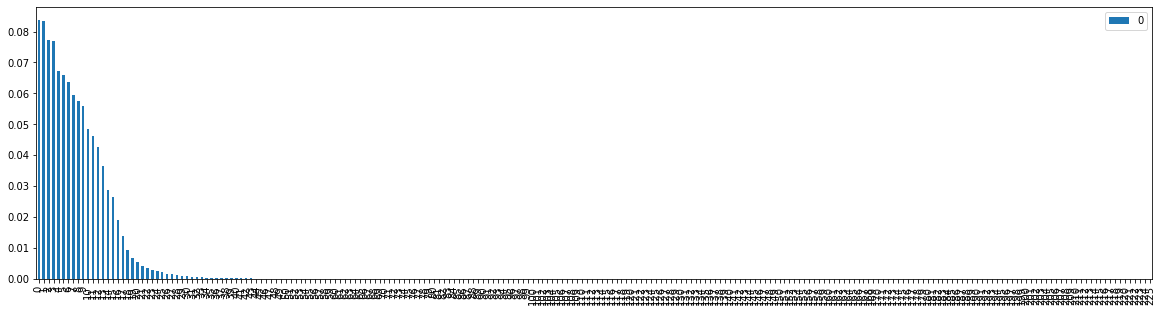

In [20]:
pd.DataFrame(pca.explained_variance_ratio_).plot(kind='bar', figsize=(20,5))

In [21]:
for i in [10, 20, 30, 40, 50, 100, 226]:
    print(i, " : ", pca.explained_variance_ratio_[:i].sum())

10  :  0.6913211662665404
20  :  0.9686763940305427
30  :  0.9941877973153769
40  :  0.9978569908937763
50  :  0.9984449398988817
100  :  0.9989598188887998
226  :  1.0


In [ ]:
 model.fit(X_train,y_train, batch_size= 512, epochs= 1000, verbose=2, validation_split= 0.3)

Epoch 1/1000
886/886 - 4s - loss: 77.7587 - mean_absolute_error: 77.7587 - val_loss: 63.9567 - val_mean_absolute_error: 63.9567
Epoch 2/1000
886/886 - 3s - loss: 63.2206 - mean_absolute_error: 63.2206 - val_loss: 61.0486 - val_mean_absolute_error: 61.0486
Epoch 3/1000
886/886 - 3s - loss: 60.2876 - mean_absolute_error: 60.2876 - val_loss: 57.9279 - val_mean_absolute_error: 57.9279
Epoch 4/1000
886/886 - 3s - loss: 58.2510 - mean_absolute_error: 58.2510 - val_loss: 56.5174 - val_mean_absolute_error: 56.5174
Epoch 5/1000
886/886 - 4s - loss: 57.2266 - mean_absolute_error: 57.2266 - val_loss: 55.4614 - val_mean_absolute_error: 55.4614
Epoch 6/1000
886/886 - 3s - loss: 56.2992 - mean_absolute_error: 56.2992 - val_loss: 54.5414 - val_mean_absolute_error: 54.5414
Epoch 7/1000
886/886 - 3s - loss: 55.4342 - mean_absolute_error: 55.4342 - val_loss: 53.6441 - val_mean_absolute_error: 53.6441
Epoch 8/1000
886/886 - 3s - loss: 54.7256 - mean_absolute_error: 54.7256 - val_loss: 52.9165 - val_mean_